# Data Analyst iKame Test 

    To increase revenue and profit, I recommend:
        1. Increasing the number of new customers
        2. Increasing the repurchase rate
        3. Increasing the selling price and reduce cost of goods sold
    -> In the given data, I will analyze factors 1 and 2. Factor 3 needs to observe corporate financial statements and additional information to make a decision

    For a better suggestion I need the inventory table about product name, the time in stock and the discounted selling price. This table is an important factor of a retail business to make a decision to import goods, liquidate inventory that is too long.

In [64]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Preview the dataframe
sales = pd.read_csv("f_sales - Sheet1.csv")
sales.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,SalesAmount,OrderDate
0,528,20130128,14870,4,SO51900,1,1,4.99,1.87,0.3992,5.0,2013-01-28
1,528,20130129,15319,4,SO51948,1,1,4.99,1.87,0.3992,5.0,2013-01-29
2,528,20130131,16384,4,SO52043,1,1,4.99,1.87,0.3992,5.0,2013-01-31
3,528,20130131,15476,4,SO52045,1,1,4.99,1.87,0.3992,5.0,2013-01-31
4,528,20130201,15861,4,SO52094,1,1,4.99,1.87,0.3992,5.0,2013-02-01


In [90]:
customer = pd.read_csv("d_customer - Sheet1.csv")
customer.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,NumberCarsOwned,DateFirstPurchase,CommuteDistance,BirthYear,FirstPurchaseYear,FirstPurchaseAge,Age
0,11602,135,AW00011602,Larry,Gill,1982-10-11,S,M,"£30,000",0,0,Partial College,Clerical,1,2013-07-10,2-5 Miles,1982,2013,31,25-34
1,11603,244,AW00011603,Geoffrey,Gonzalez,1982-08-06,S,M,"£30,000",0,0,Partial College,Clerical,1,2012-01-18,0-1 Miles,1982,2012,30,25-34
2,11610,269,AW00011610,Blake,Collins,1980-10-20,S,M,"£30,000",0,0,Partial College,Clerical,1,2012-01-10,0-1 Miles,1980,2012,32,25-34
3,12517,133,AW00012517,Alexa,Watson,1983-02-22,S,F,"£30,000",0,0,Partial College,Clerical,1,2013-10-19,2-5 Miles,1983,2013,30,25-34
4,12518,161,AW00012518,Jacquelyn,Dominguez,1983-03-27,S,F,"£30,000",0,0,Partial College,Clerical,1,2013-08-01,2-5 Miles,1983,2013,30,25-34


In [101]:
df = pd.merge(sales, customer, how="left", on=["CustomerKey"])
df.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,...,NumberChildrenAtHome_y,Education_y,Occupation_y,NumberCarsOwned_y,DateFirstPurchase_y,CommuteDistance_y,BirthYear_y,FirstPurchaseYear_y,FirstPurchaseAge_y,Age_y
0,528,20130128,14870,4,SO51900,1,1,4.99,1.87,0.3992,...,3,Partial College,Clerical,2,2013-01-28,0-1 Miles,1979,2013,34,25-34
1,528,20130129,15319,4,SO51948,1,1,4.99,1.87,0.3992,...,1,Bachelors,Management,1,2013-01-29,1-2 Miles,1952,2013,61,55-64
2,528,20130131,16384,4,SO52043,1,1,4.99,1.87,0.3992,...,0,Graduate Degree,Skilled Manual,0,2013-01-31,0-1 Miles,1964,2013,49,45-54
3,528,20130131,15476,4,SO52045,1,1,4.99,1.87,0.3992,...,0,Graduate Degree,Professional,0,2013-01-31,2-5 Miles,1975,2013,38,35-44
4,528,20130201,15861,4,SO52094,1,1,4.99,1.87,0.3992,...,4,Partial College,Clerical,2,2013-02-01,0-1 Miles,1977,2013,36,35-44


### 1. Increasing the number of new customers

To increase the number of new customers, we can develop marketing to potential customers.

In [121]:
customer_demographic = df.groupby(['Age_x','MaritalStatus_x','Gender_x'])['SalesAmount'].sum().sort_values(ascending=False)
customer_demographic

Age_x  MaritalStatus_x  Gender_x
35-44  S                F           3077775.0
       M                M           2594259.0
                        F           2569212.0
       S                M           2563922.0
25-34  S                F           2282209.0
                        M           2137129.0
45-54  M                M           2128262.0
                        F           1877022.0
25-34  M                M           1822282.0
                        F           1561402.0
45-54  S                F           1461842.0
                        M           1308584.0
55-64  M                M           1066664.0
                        F            996861.0
       S                F            548999.0
                        M            435135.0
65+    M                M            308121.0
                        F            261767.0
       S                M            179248.0
                        F            175015.0
Name: SalesAmount, dtype: float64

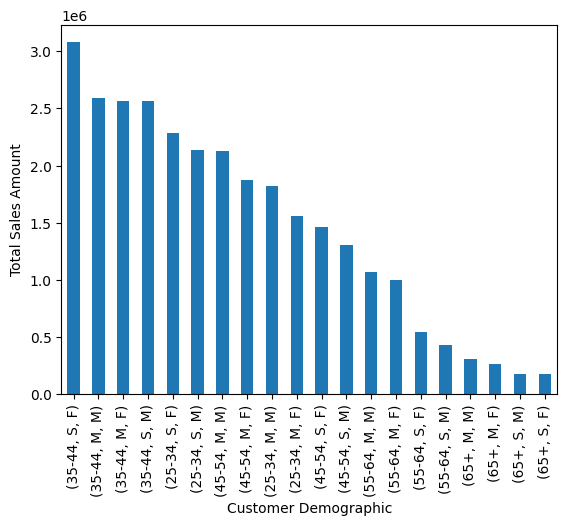

In [122]:
customer_demographic.plot(x=["Age_x", "User MaritalStatus_x","Gender_x"], y="SalesAmount", kind="bar")

plt.xlabel('Customer Demographic')
plt.ylabel('Total Sales Amount')

plt.show()

-> Single female customers in the range of 35-44 potential to develop marketing

In [111]:
Customer_YearlyIncome = df.groupby('YearlyIncome_x')['SalesAmount'].sum().sort_values(ascending=False)
Customer_YearlyIncome

YearlyIncome_x
£70,000     4483925.0
£60,000     4230016.0
£40,000     4226106.0
£30,000     2921909.0
£80,000     2391296.0
£90,000     2066890.0
£20,000     2010377.0
£10,000     1396156.0
£130,000    1192864.0
£100,000    1072927.0
£110,000    1019440.0
£50,000      805423.0
£120,000     760552.0
£170,000     325268.0
£150,000     241456.0
£160,000     211105.0
Name: SalesAmount, dtype: float64

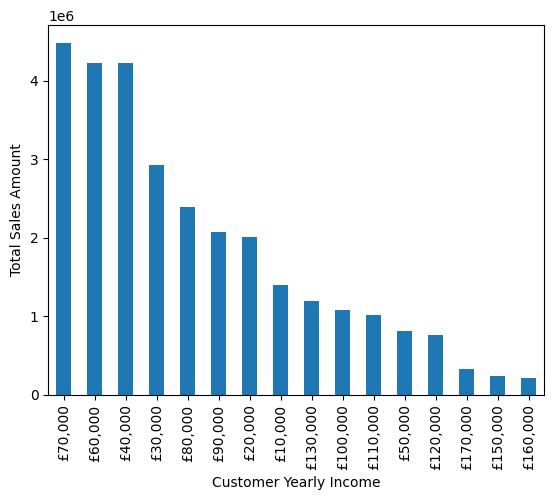

In [89]:
Customer_YearlyIncome.plot(kind='bar')

plt.xlabel('Customer Yearly Income')
plt.ylabel('Total Sales Amount')

plt.show()

-> Customer with Yearly Income range of £40000 - £70000 is potential to develop marketing

###  2. Increasing the repurchase rate

    To increase the rate of repurchase, we can offer promotions, gifts, discounts to loyal customers and customers who have not made a purchase in a while.

#### Finding loyal customers who have purchased more than 30 orders in the last 2 years

In [71]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales_2013_2014 = sales[(sales['OrderDate'].dt.year == 2013) | (sales['OrderDate'].dt.year == 2014)]

In [72]:
purchase_counts = sales_2013_2014.groupby('CustomerKey')['OrderDate'].count()
purchase_counts.head()

CustomerKey
11000     7
11001    10
11002     2
11003     8
11004     5
Name: OrderDate, dtype: int64

In [73]:
loyal_customers = purchase_counts[purchase_counts > 10]
loyal_customers.head()

CustomerKey
11019    33
11078    31
11091    59
11142    36
11176    60
Name: OrderDate, dtype: int64

####  Finding customers who have not made a purchase in a while?

In [124]:
last_purchase_date = sales.groupby('CustomerKey')['OrderDate'].max()
last_purchase_date.head()

CustomerKey
11000   2013-05-03
11001   2013-12-10
11002   2013-02-23
11003   2013-05-10
11004   2013-05-01
Name: OrderDate, dtype: datetime64[ns]

In [129]:
days_since_last_purchase = pd.to_datetime('2014-01-29') - last_purchase_date
days_since_last_purchase.head()

CustomerKey
11000   271 days
11001    50 days
11002   340 days
11003   264 days
11004   273 days
Name: OrderDate, dtype: timedelta64[ns]